In [16]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("../data/Diabetes_US_Hospitals_dataset/diabetic_data.csv")

# Data preprocessing
df = df[df['gender'].isin(['Male', 'Female'])]
df['time_in_hospital'] = pd.to_numeric(df['time_in_hospital'], errors='coerce')

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [15]:
# Split data by gender
male_stay = df[df['gender'] == 'Male']['time_in_hospital'].dropna()
female_stay = df[df['gender'] == 'Female']['time_in_hospital'].dropna()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(male_stay, female_stay, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -9.540877884006916, P-value: 1.4467409191124233e-21


Univariate Test for Normality Application


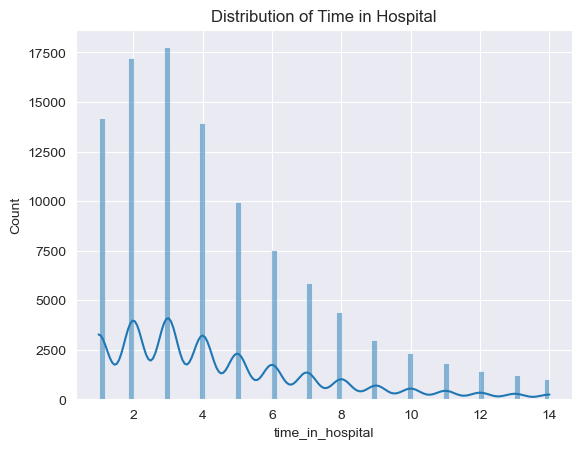

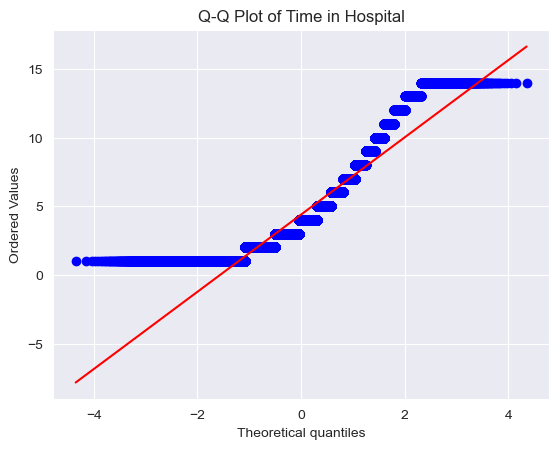

In [14]:
# Histogram
sns.histplot(df['time_in_hospital'], kde=True)
plt.title("Distribution of Time in Hospital")
plt.show()

# Q-Q Plot
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['time_in_hospital'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot of Time in Hospital")
plt.show()

In [13]:
# Shapiro-Wilk Test
shapiro_test = stats.shapiro(df['time_in_hospital'].dropna())
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, P-value: {shapiro_test.pvalue}")

# Alternative normality tests
from scipy.stats import anderson, normaltest, kstest

# Anderson-Darling Test
anderson_test = anderson(df['time_in_hospital'].dropna(), dist='norm')
print(f"Anderson-Darling Test Statistic: {anderson_test.statistic}")

# D'Agostino and Pearson's Test
dagostino_test = normaltest(df['time_in_hospital'].dropna())
print(f"D'Agostino-Pearson Test Statistic: {dagostino_test.statistic}, P-value: {dagostino_test.pvalue}")

# Kolmogorov-Smirnov Test
ks_test = kstest(df['time_in_hospital'].dropna(), 'norm')
print(f"Kolmogorov-Smirnov Test Statistic: {ks_test.statistic}, P-value: {ks_test.pvalue}")


Shapiro-Wilk Test Statistic: 0.886908694614476, P-value: 4.411721910114492e-116
Anderson-Darling Test Statistic: 3377.358604882087
D'Agostino-Pearson Test Statistic: 16040.339153506728, P-value: 0.0
Kolmogorov-Smirnov Test Statistic: 0.8413447460685429, P-value: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 101763.
  res = hypotest_fun_out(*samples, **kwds)
